## Import library dan dataset
Pada awalnya kita import semua library yang dibutuhkan lalu define variable data frame yang dibaca dari csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv('Cars-Datasets-2025-utf8.csv')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [22]:
df['CC/Battery Capacity'].value_counts()

CC/Battery Capacity
1984 cc              31
2,000 cc             31
2,500 cc             25
1591 cc              22
3996 cc              20
                     ..
3495 cc               1
6749 cc               1
2999 cc               1
659 cc                1
2393 cc + Battery     1
Name: count, Length: 306, dtype: int64

### Jumlah yang hilang pada setiap atribut

In [21]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

### Menghapus missing value
missing value dihapus karena cukup rumit kalau mau diperkirakan kira kira nilainya berapa

In [4]:
df = df.dropna()

In [5]:
df = df[df["Cars Prices"] != "N/A (Concept Only)"]

### Membuat tipe data numerik jadi float
karena pada awalnya semua atribut dari kaggle bertipe object atau string dan banyak simbol simbol yang tidak dibutuhkan dalam EDA

In [6]:
df['Total Speed'] = df['Total Speed'].str.replace(' km/h', '').astype(float)

In [7]:
def clean_price(x):
    # hapus simbol $, €, spasi
    x_clean = re.sub(r'[^\d/–\-]', '', x)
    # ganti tanda '-' atau '/' jadi ','
    x_clean = re.sub(r'[-/–]', ',', x_clean)
    # pisah dan ubah ke int
    numbers = [int(num) for num in x_clean.split(',') if num]
    # hitung rata-rata
    return np.mean(numbers)

df['Cars Prices'] = df['Cars Prices'].apply(clean_price)

In [8]:
def clean_hp(x):
    x = x.lower()
    x = re.sub(r'(hp|up to|~)', '', x)   # hapus kata
    x = re.sub(r'[^0-9,/-]', '', x)      # hapus huruf lain (cc, spasi, dll)
    x = x.replace(',', '')                # hapus koma ribuan
    x = re.sub(r'[-/]', ',', x)          # ganti '-' atau '/' jadi ','
    numbers = [int(num) for num in x.split(',') if num]
    return np.mean(numbers) if numbers else np.nan  # jika kosong, beri NaN

df['HorsePower'] = df['HorsePower'].apply(clean_hp)

In [9]:
def clean_torque(x):
    x = x.lower()
    x = re.sub(r'nm|\+|\(.*?\)', '', x)        # hapus 'Nm', '+', isi kurung
    x = x.replace(',', '')                      # hapus koma ribuan
    x = re.sub(r'[-–/]', ',', x)               # ganti '-' atau '–' atau '/' jadi ','
    x = x.replace(' ', '')                      # hapus spasi
    numbers = [int(num) for num in x.split(',') if num]
    return np.mean(numbers) if numbers else np.nan

df['Torque'] = df['Torque'].apply(clean_torque)

In [10]:
def clean_performance(x):
    x = str(x).lower()
    x = x.replace('–', '-')           # ganti en dash ke minus
    x = re.sub(r'[^0-9.+/-]', '', x)  # hapus huruf, kurung, spasi
    x = x.replace(' ', '')

    # pisahkan angka berdasarkan +, /, -
    numbers = re.split(r'[+/-]', x)
    numbers = [float(n) for n in numbers if n]

    return float(np.mean(numbers)) if numbers else np.nan

df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(clean_performance)


In [11]:
def clean_seats(x):
    x = x.replace(' ', '')               # hapus spasi
    x = x.replace('–', '-')              # ganti en dash ke minus biasa
    if '+' in x:
        numbers = [int(n) for n in x.split('+')]
        return float(sum(numbers))
    elif '-' in x:
        numbers = [int(n) for n in x.split('-')]
        return float(np.mean(numbers))
    else:
        return float(x)

df['Seats'] = df['Seats'].apply(clean_seats)

### Menampilkan 5 baris pertama data frame

In [12]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2.0,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0
2,Ford,KA+,1.2L Petrol,"1,200 cc",77.5,165.0,10.5,13500.0,Petrol,5.0,120.0
3,MERCEDES,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4.0,900.0
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2.0,560.0


### Mengidentifikasi tipe data dari setiap atribut

In [13]:
df.dtypes

Company Names                 object
Cars Names                    object
Engines                       object
CC/Battery Capacity           object
HorsePower                   float64
Total Speed                  float64
Performance(0 - 100 )KM/H    float64
Cars Prices                  float64
Fuel Types                    object
Seats                        float64
Torque                       float64
dtype: object

### Statistik deskriptif untuk atribut numerik

In [14]:
df.describe()

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque
count,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,1210.000000
mean,742.271074,216.848760,7.567355,1.385099e+05,4.850413,506.991736
std,8905.244067,52.719519,3.306100,7.130675e+05,1.403330,1052.394791
min,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,154.250000,180.000000,5.300000,2.800000e+04,4.000000,250.000000
50%,255.000000,200.000000,7.100000,4.250000e+04,5.000000,370.000000
75%,400.000000,250.000000,9.500000,7.000000e+04,5.000000,560.000000
max,219302.000000,500.000000,35.000000,1.800000e+07,12.000000,15590.000000


### Deteksi outlier pada atribut numerik

Outliers in Performance(0 - 100 )KM/H:
317     23.0
318     17.5
477     18.0
478     18.5
635     29.0
636     16.0
637     16.0
641     16.5
643     17.0
645     17.0
652     16.0
655     17.6
892     16.0
893     16.5
895     17.0
896     18.0
897     20.0
898     22.0
1125    16.0
1162    16.0
1174    18.0
1182    16.0
1197    35.0
Name: Performance(0 - 100 )KM/H, dtype: float64


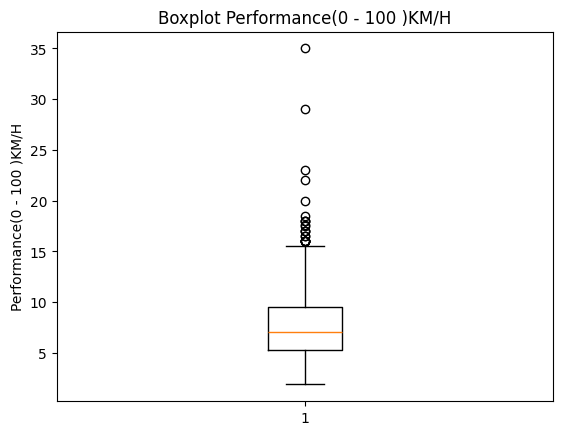

Outliers in HorsePower:
0          963.0
10         789.0
13         789.0
32        1160.0
33        1000.0
41         836.0
42         819.0
54         769.0
59         769.0
64         769.0
660       1020.0
664       1020.0
667        800.0
668       1288.0
795        830.0
796       1000.0
810        830.0
812       1000.0
819        830.0
880       1500.0
881       1500.0
882       1600.0
883       1500.0
884       1500.0
885       1500.0
886       1600.0
887       1500.0
888       1850.0
889       1600.0
1215    169196.0
1216    140198.0
1217    219302.0
Name: HorsePower, dtype: float64


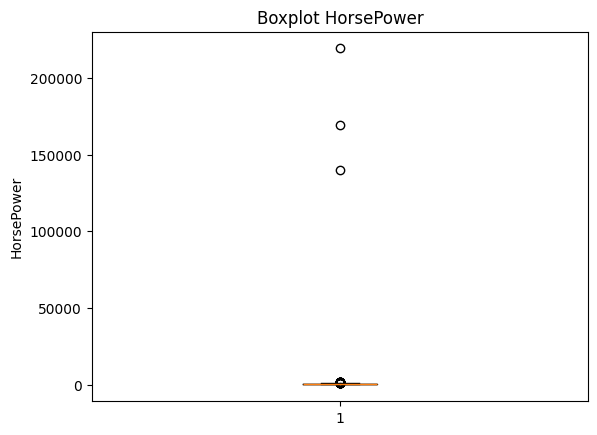

Outliers in Torque:
561      1050.0
607      1050.0
660      1400.0
664      1400.0
667      1355.0
668     10000.0
716      1234.0
739      1234.0
749      1234.0
768      1234.0
776      1234.0
795     15590.0
796     15590.0
810     15590.0
811      1064.0
812     15590.0
819     15590.0
880      1600.0
881      1600.0
882      1600.0
883      1600.0
884      1600.0
885      1600.0
886      1600.0
887      1600.0
888      1600.0
889      1600.0
890      2600.0
891      3500.0
892      2200.0
893      2500.0
894      2400.0
895      1800.0
896      2500.0
897      1200.0
1028     1125.0
1032     1051.0
1048     1424.0
1049     1424.0
Name: Torque, dtype: float64


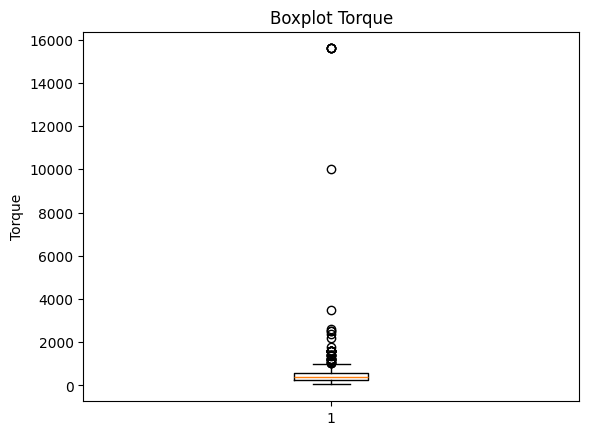

Outliers in Total Speed:
8      356.0
32     402.0
33     362.0
668    402.0
880    420.0
882    490.0
883    420.0
884    420.0
885    380.0
886    380.0
887    420.0
888    500.0
889    420.0
Name: Total Speed, dtype: float64


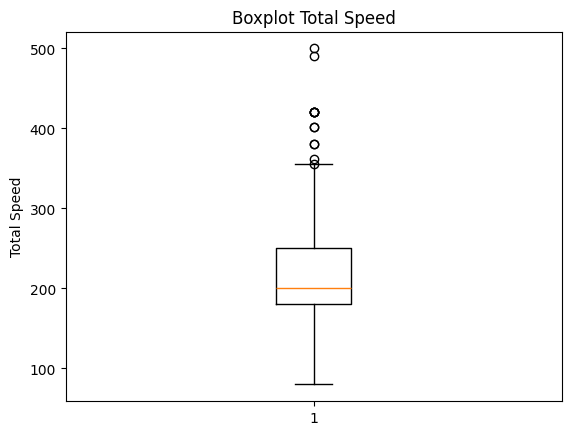

Outliers in Cars Prices:
0       1100000.0
1        460000.0
3        161000.0
4        253290.0
5        499000.0
          ...    
953      150000.0
958      157000.0
961      157000.0
1036     500000.0
1212    6000000.0
Name: Cars Prices, Length: 148, dtype: float64


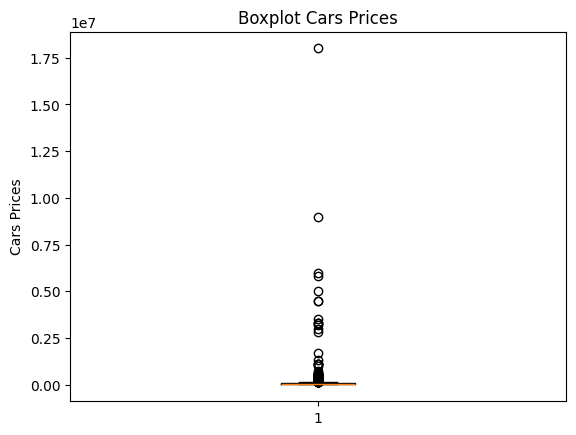

Outliers in Seats:
0       2.0
4       2.0
5       2.0
6       2.0
8       2.0
       ... 
1206    2.0
1208    2.0
1209    2.0
1212    1.0
1214    7.0
Name: Seats, Length: 315, dtype: float64


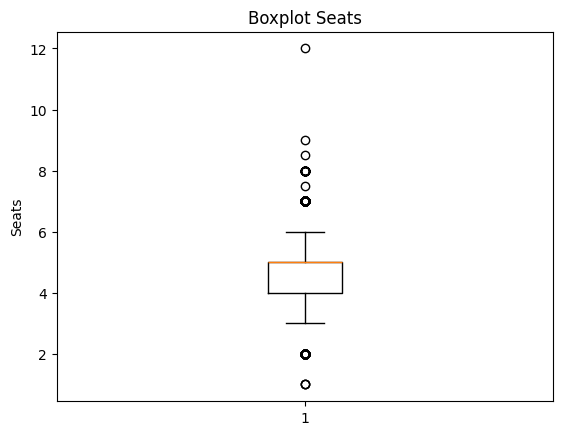

In [ ]:
columns = ['Performance(0 - 100 )KM/H', 'HorsePower', 'Torque', 'Total Speed', 'Cars Prices', 'Seats']

for col in columns:
    # Hitung Q1, Q3, IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Visualisasi boxplot
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.show()


outlier yang dihapus hanya pada atribut horsepower, karna itu sangat berlebihan dan tidak sesuai data, dan outlier pada atribut lain masih tergolong rasional dan sesuai data yang ada di internet

In [16]:
outlier_horsePower = [169196.0, 140198.0, 219302.0]
df = df[~df['HorsePower'].isin(outlier_horsePower)]

In [20]:
df['CC/Battery Capacity'].value_counts()

CC/Battery Capacity
1984 cc              31
2,000 cc             31
2,500 cc             25
1591 cc              22
3996 cc              20
                     ..
3495 cc               1
6749 cc               1
2999 cc               1
659 cc                1
2393 cc + Battery     1
Name: count, Length: 306, dtype: int64

## Histogram Distribusi total speed (km/h)
ini adalah hasil dari distribusi total speed yang menunjukkan rata rata total speed mobil ada dikisaran 180 - 210 km/h, dan sangat sedikit mobil yang memiliki total speed sampai 500 km/h, hanya mobil mobil tertentu saja seperti bugati dan mobil hypercar lainnya

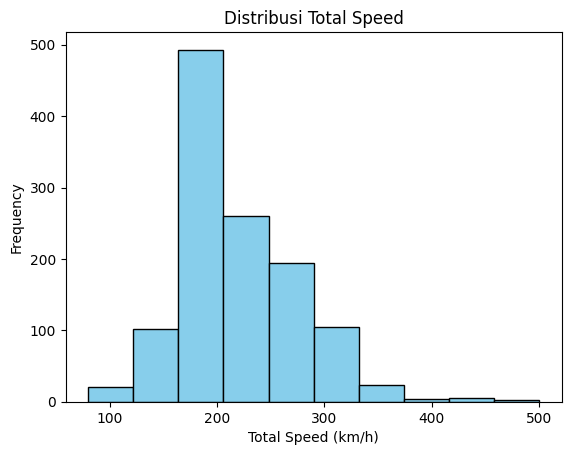

In [17]:
plt.hist(df['Total Speed'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Total Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribusi Total Speed')
plt.show()


## Scatter plot hubungan antara horse power dan car price
dari data ini kita dapat rata rata harga mobil kurang dari $100,000. dan memang ada mobil yang harganya sampai $18,000,000 seperti bugati

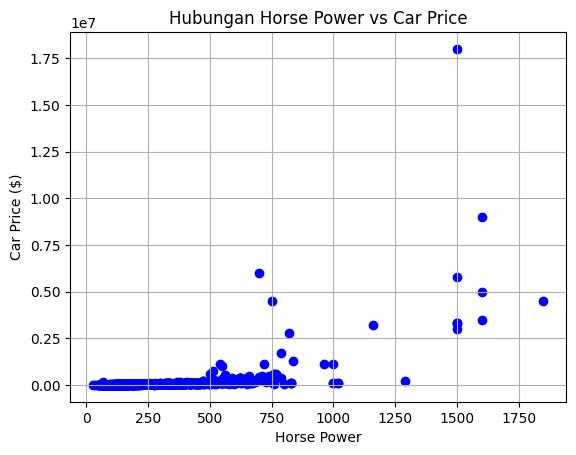

In [18]:
plt.scatter(df['HorsePower'], df['Cars Prices'], color='blue')
plt.xlabel('Horse Power')
plt.ylabel('Car Price ($)')
plt.title('Hubungan Horse Power vs Car Price')
plt.grid(True)
plt.show()

## Bar chart jumlah mobil berdasarkan fuel types
Rerata mobil memiliki jenis bensin petrol

<Axes: xlabel='Fuel Types'>

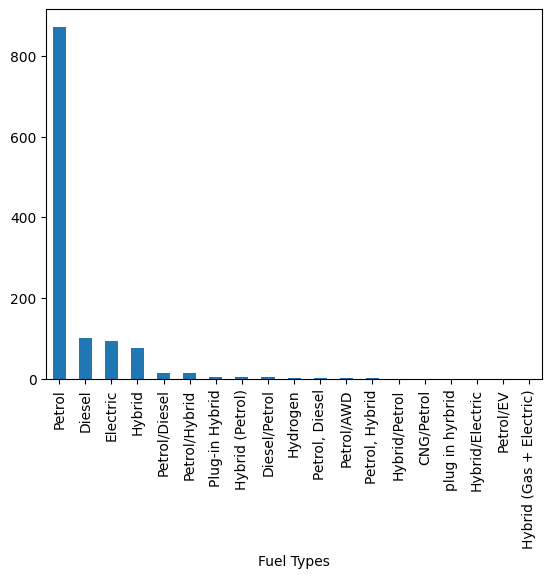

In [19]:
df['Fuel Types'].value_counts().plot(kind='bar')